# Dataset Load

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# !unzip "/content/drive/MyDrive/LandSlideDataset.zip" -d "/content"

# Load Important Modules

In [2]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
### ML Models
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

# Exploratory Data Analysis

In [6]:
df = pd.read_csv('../Dataset/Dis2.csv')
df.head(5)

,Y,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
0,1,38,43,2,10,11,22,7,45,24,36,16,29,32,88,18
1,1,57,52,2,10,26,31,11,30,23,12,22,29,28,88,10
2,1,57,52,2,10,26,31,11,45,30,17,36,29,28,88,10
3,1,38,43,2,10,26,6,7,16,23,17,22,29,28,88,10
4,1,38,43,2,10,26,31,15,45,30,17,36,29,28,88,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Y           392 non-null    int64
 1   PROFILE     392 non-null    int64
 2   PLAN        392 non-null    int64
 3   CHANGE      392 non-null    int64
 4   LANDUSE     392 non-null    int64
 5   ELEVATION   392 non-null    int64
 6   SLOPE       392 non-null    int64
 7   ASPECT      392 non-null    int64
 8   TWI         392 non-null    int64
 9   SPI         392 non-null    int64
 10  DRAINAGE    392 non-null    int64
 11  NDVI        392 non-null    int64
 12  RAINFALL    392 non-null    int64
 13  FAULTLINES  392 non-null    int64
 14  ROAD        392 non-null    int64
 15  GEOLOGY     392 non-null    int64
dtypes: int64(16)
memory usage: 49.1 KB


In [ ]:
df.describe()

,Y,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.500000,40.385204,39.954082,3.966837,15.102041,23.316327,13.849490,11.306122,27.645408,23.173469,22.571429,21.010204,21.933673,24.908163,56.168367,10.923469
std,0.500639,16.635004,17.487092,5.047237,16.833768,14.809686,9.289342,4.733638,14.807176,6.693166,11.112998,11.792750,12.158615,9.458578,40.328158,10.809168
min,0.000000,5.000000,5.000000,0.000000,0.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,43.000000,2.000000,10.000000,11.000000,6.000000,10.000000,16.000000,23.000000,12.000000,16.000000,10.000000,28.000000,9.000000,0.000000
50%,0.500000,38.000000,43.000000,2.000000,10.000000,19.500000,13.000000,13.000000,30.000000,24.000000,17.000000,22.000000,21.000000,28.000000,88.000000,10.000000
75%,1.000000,57.000000,52.000000,4.250000,10.000000,26.000000,22.000000,15.000000,45.000000,30.000000,36.000000,36.000000,35.000000,32.000000,88.000000,19.000000
max,1.000000,57.000000,52.000000,23.000000,61.000000,50.000000,31.000000,17.000000,45.000000,30.000000,36.000000,36.000000,35.000000,32.000000,88.000000,40.000000


## Feature Engineering

### Feature and Target Variable Split

In [ ]:
X = df.drop(["Y"], axis=1)

In [ ]:
X.head(2)

,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
0,38,43,2,10,11,22,7,45,24,36,16,29,32,88,18
1,57,52,2,10,26,31,11,30,23,12,22,29,28,88,10


In [ ]:
y = df[['Y']]

In [ ]:
y.head(2)

,Y
0,1
1,1


### Counting

In [ ]:
def count_categories(feature): 
  # print(df[feature].value_counts())
  plt.figure(figsize=(2, 2))
  sns.countplot(
      x=feature,
      data=df
  );

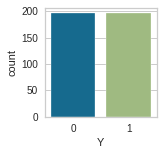

In [ ]:
count_categories('Y')

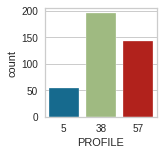

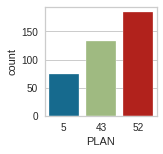

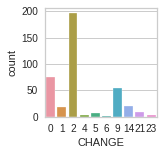

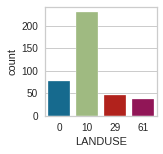

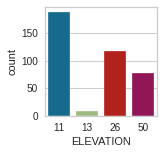

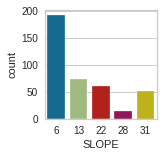

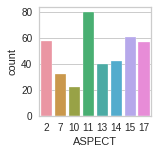

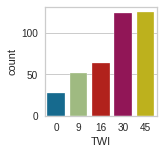

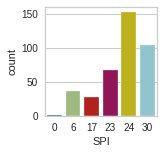

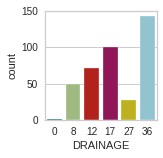

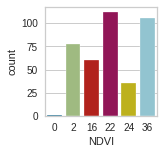

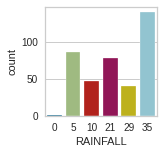

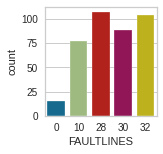

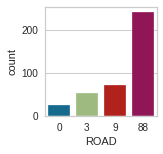

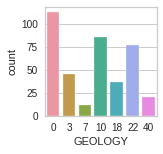

In [ ]:
for feature in X.columns:
  count_categories(feature)

1    196
0    196
Name: Y, dtype: int64


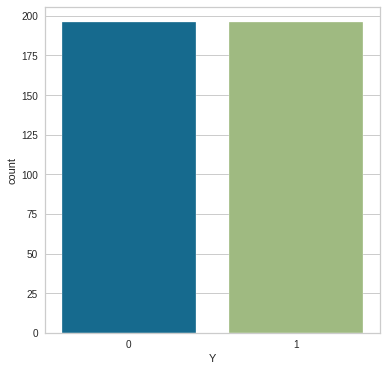

In [ ]:
print(df['Y'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Y',
    data=df
);

### Feature Significance Examination

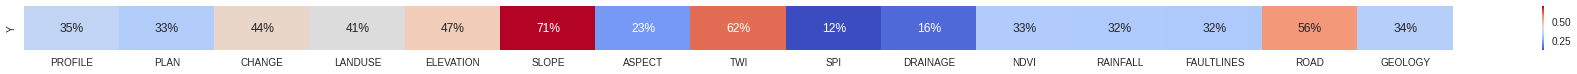

In [ ]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=df.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

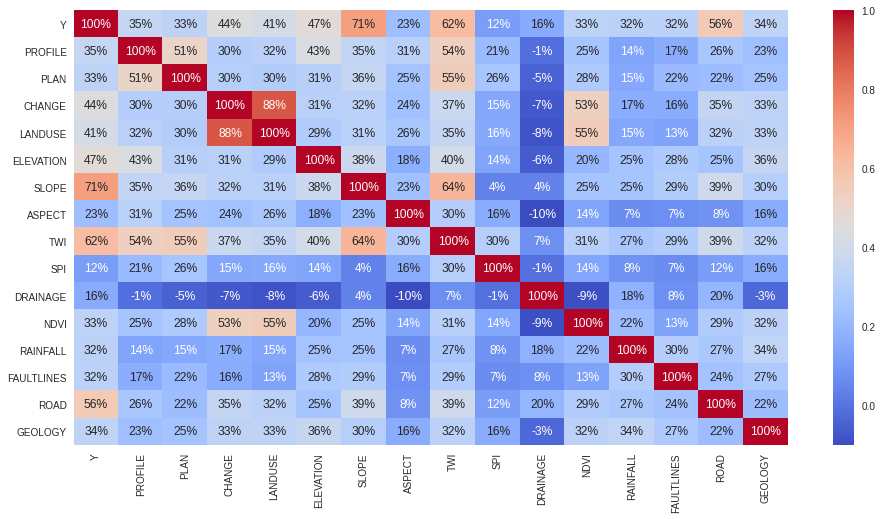

In [ ]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=df.corr('kendall'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

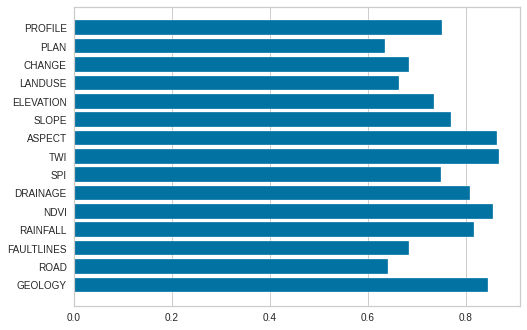

In [ ]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features= X.columns)
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X.values);        # Transform the data
# visualizer.show()              # Finalize and render the figure

## Normality Test

In [ ]:
from scipy.stats import shapiro
# normality test
def normality_test_shapiro(feature):
  stat, p = shapiro(X[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')


In [ ]:
for feature in X.columns:
  normality_test_shapiro(feature)

Statistics=0.752, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.636, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.685, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.665, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.771, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.864, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.868, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.749, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.809, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.857, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.818, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.684, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.642, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.847, p=0.000
Sample does not look G

In [ ]:
from scipy.stats import normaltest
def normality_test_agostino(feature):
  # normality test
  stat, p = normaltest(X[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
for feature in X.columns:
  normality_test_agostino(feature)

Statistics=47.229, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=77.847, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=157.329, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=137.001, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=55.525, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=89.201, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=39.407, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=179.570, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=104.055, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=2534.506, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=55.106, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=3257.351, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=73.179, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=2128.620, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=46.660, p=0.0

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson

def normality_test_anderson_darling(feature):
  # normality test
  result = anderson(X[feature].values)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
for feature in X.columns:
  normality_test_anderson_darling(feature)

Statistic: 39.293
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)
Statistic: 63.251
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)
Statistic: 49.744
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)
Statistic: 54.982
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look nor

## Chi Square Test

In [ ]:
chi2(X,y)[0]

array([ 424.05918767,  559.41769889,  256.05209003,  716.82432432,
        735.06170678, 1327.91029656,   70.75812274, 1408.56777706,
         42.04359313,   69.46835443,  440.16707139,  367.67666899,
        214.73822204, 3912.95867018,  395.89070528])

In [ ]:
count = 0
for i in chi2(X,y)[1]:
  if i < 0.05:
    count += 1
print(count)

15


In [ ]:
pd.DataFrame.from_records(np.reshape(chi2(X,y)[1], (1,-1)), index= list(y.columns), columns=list(X.columns)) # p-values

,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
Y,3.190994e-94,1.125354e-123,1.244776e-57,6.564561e-158,7.105060e-162,9.726848e-291,4.038184e-17,2.888264e-308,8.926116e-11,7.765042e-17,9.956004e-98,5.998733e-82,1.271082e-48,0.0,4.320041e-88
